In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression


# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [2]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

In [3]:
def show_classification_areas(X, Y, lr):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(30, 25))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.abs(Y - 1), edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

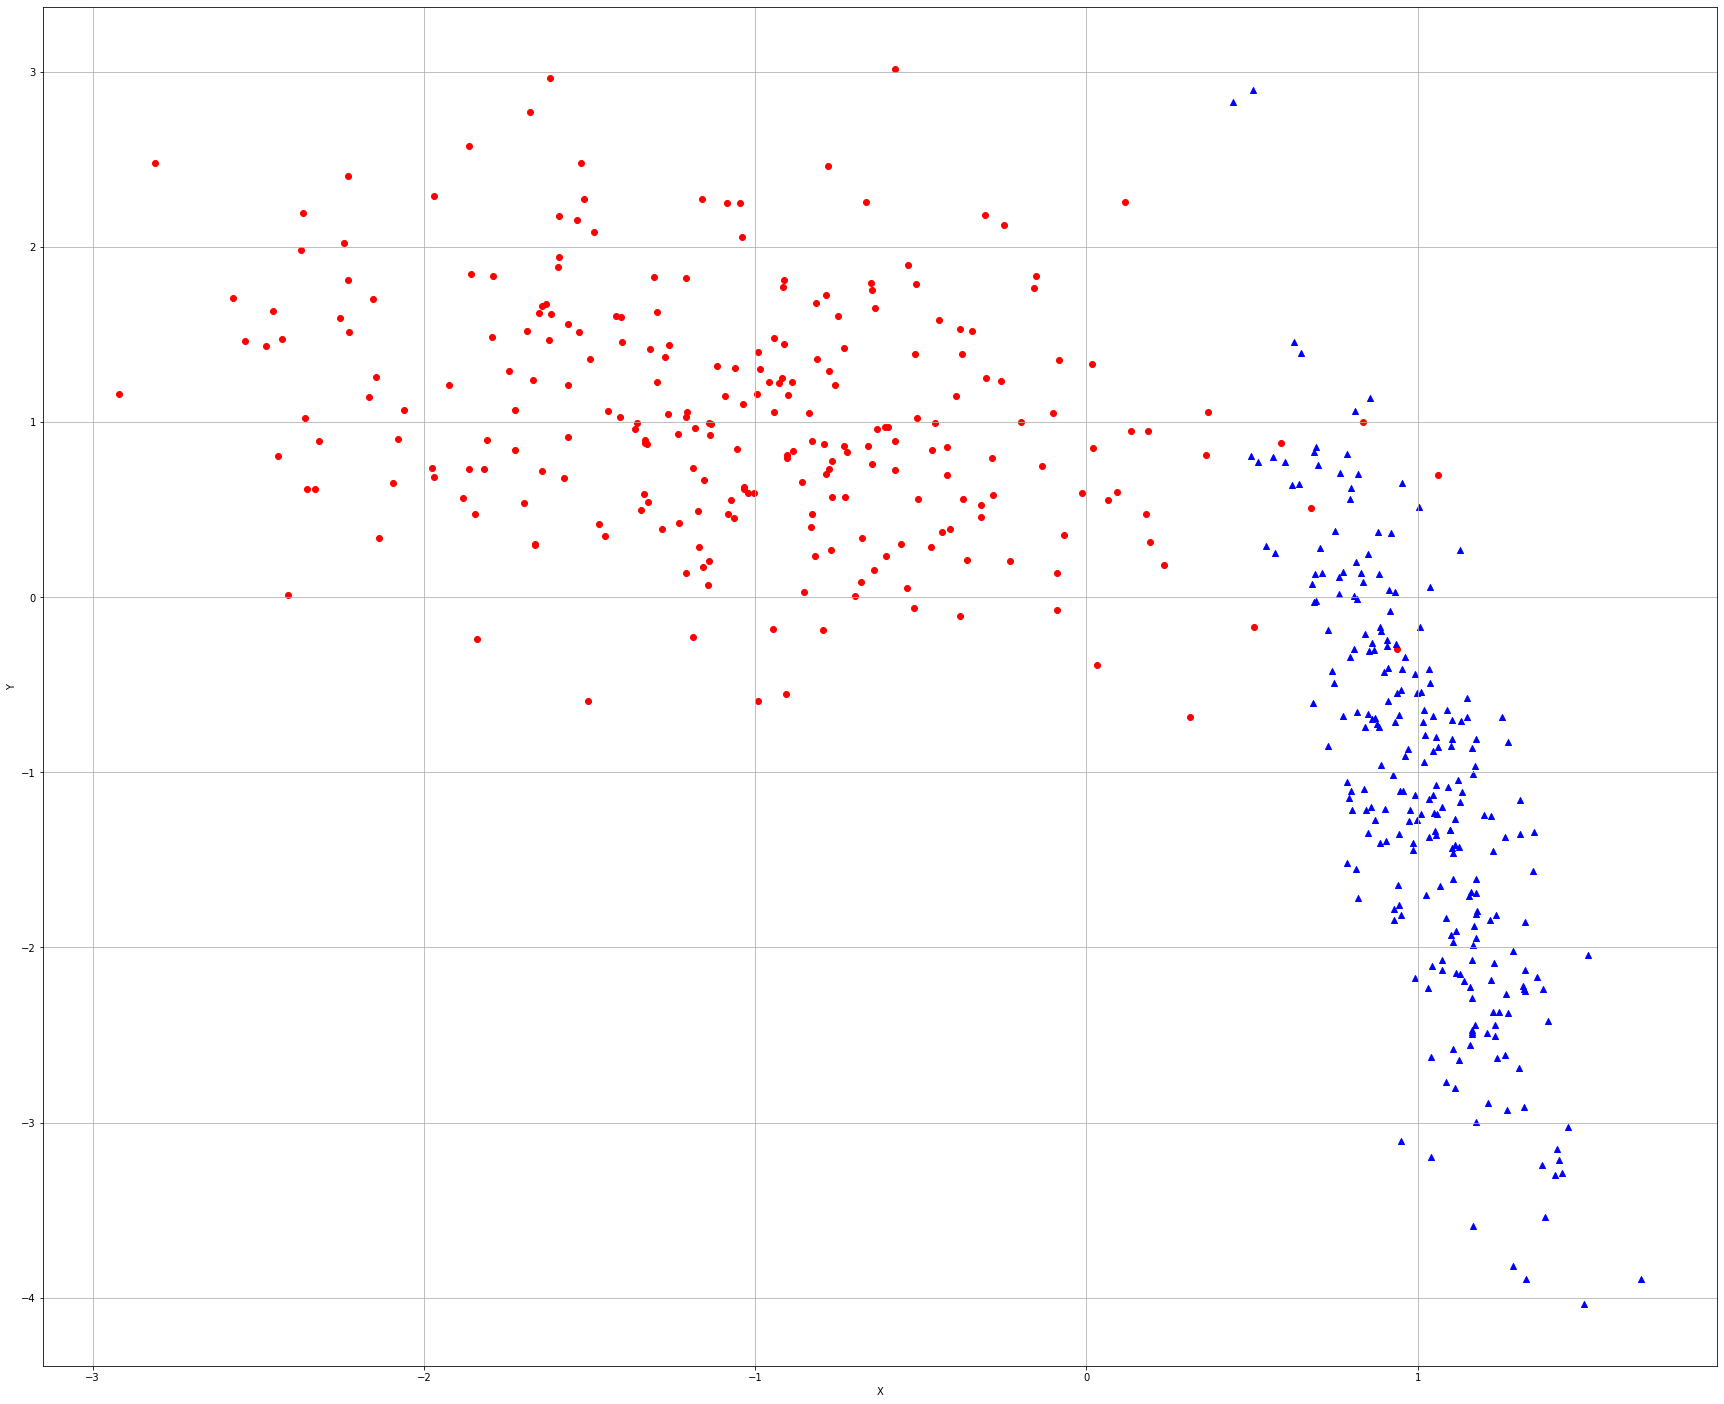

In [4]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [5]:
# Create logistic regressor
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % lr.score(X_test, Y_test))

Logistic regression score: 0.992


In [6]:
# Compute CV score
lr_scores = cross_val_score(lr, X, Y, scoring='accuracy', cv=10)
print('Logistic regression CV average score: %.3f' % lr_scores.mean())

Logistic regression CV average score: 0.982


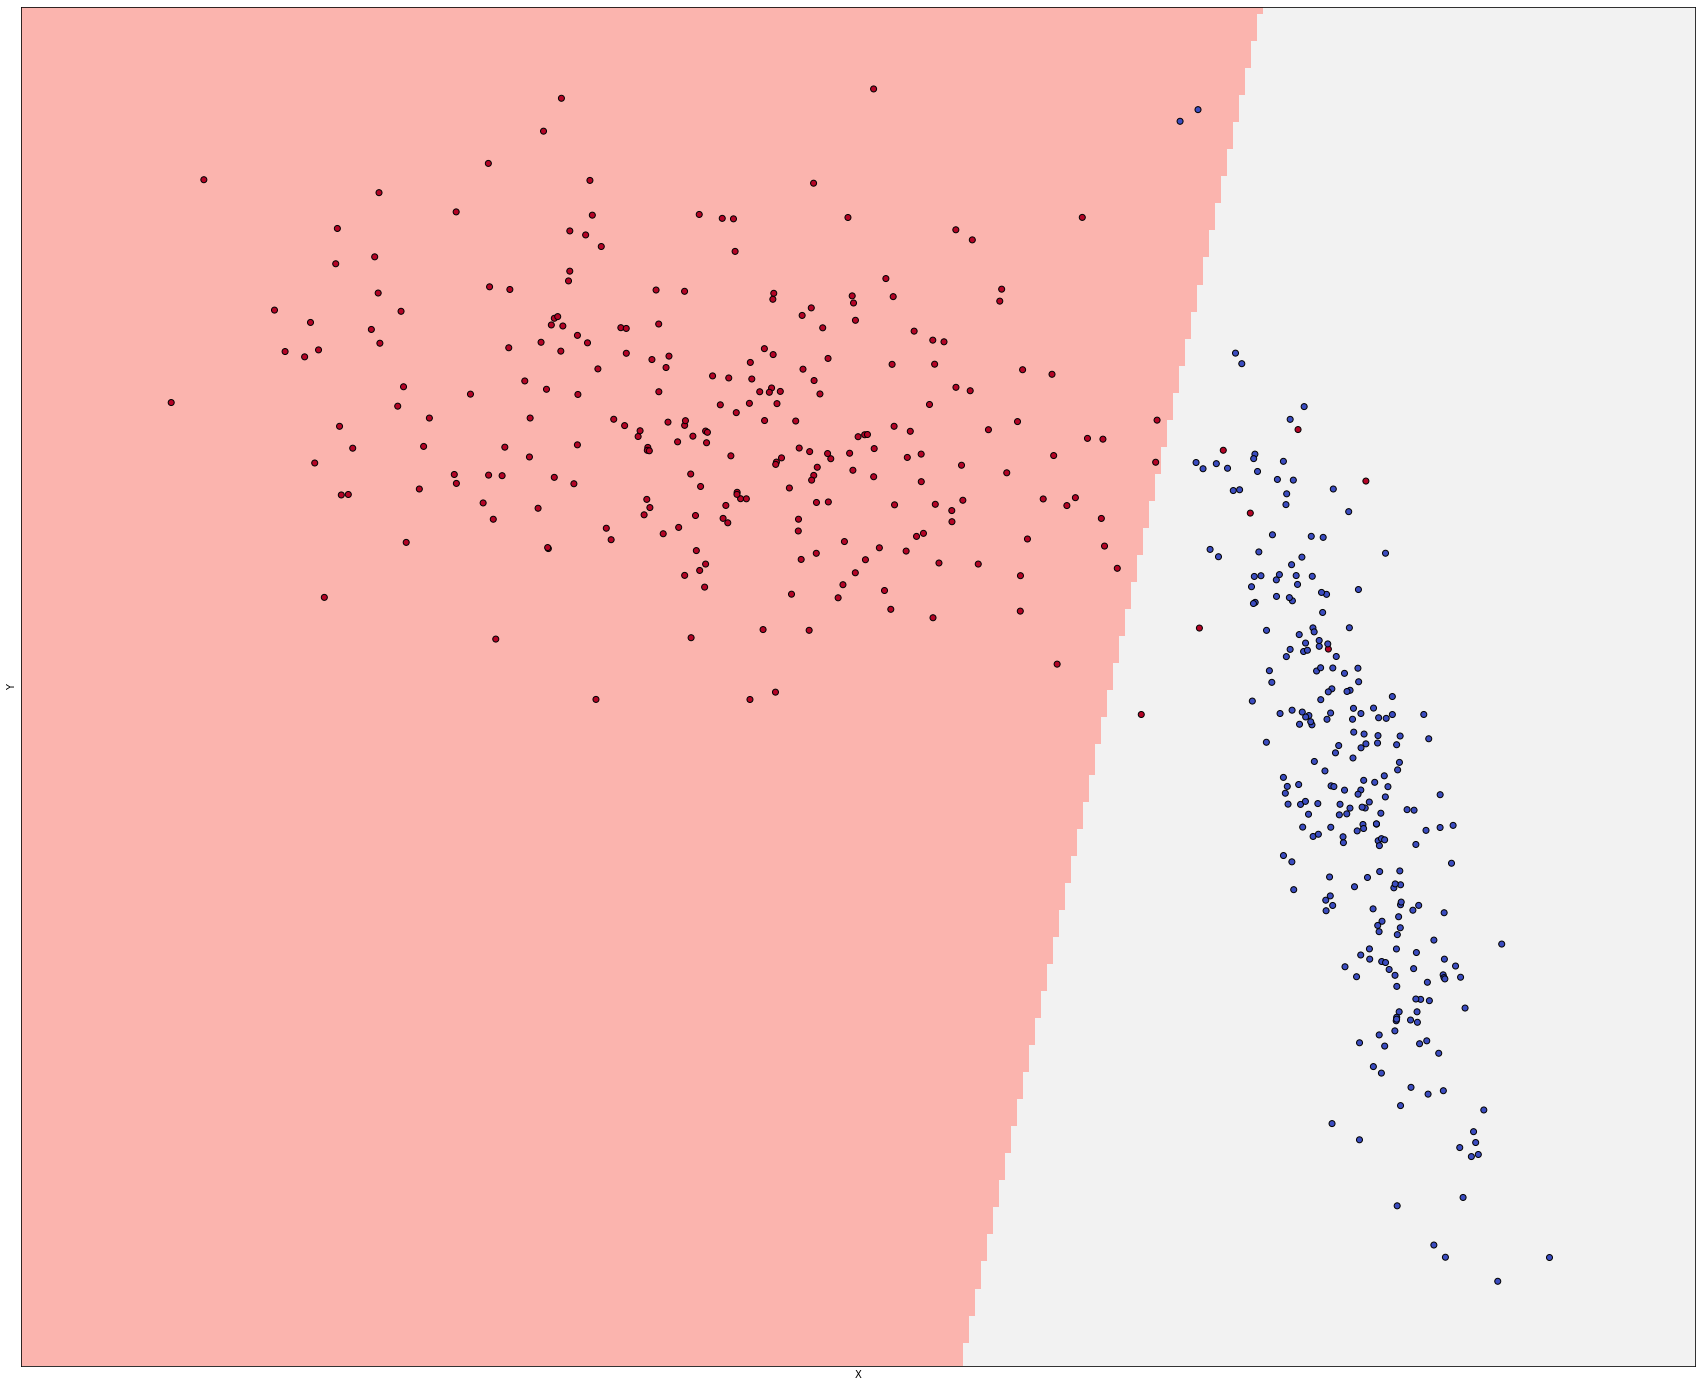

In [7]:
# Show classification areas
show_classification_areas(X, Y, lr)


In [8]:
print(lr.intercept_, lr.coef_)

[-1.15725695] [[ 4.30877167 -0.53674979]]
